In [1]:
import pandas as pd
import numpy as np


In [2]:
house  = pd.read_csv('/root/data/house_sales.csv')

In [3]:
house.head()
#house.shape

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [5]:
house['long'].min()

-122.51899999999999

## Feature selection

In [6]:
house['date'] = house['date'].astype(float)

ValueError: could not convert string to float: '20141013T000000'

In [7]:
house['long'] = house['long'].abs() #Toconvert -ve to +

In [8]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [9]:
best_features = SelectKBest(score_func=chi2, k=19)

In [10]:
x = house.drop(['price','date'], axis=1)
y = house.iloc[:,2]

In [11]:
kbest = best_features.fit(x,y)

In [12]:
kbest

SelectKBest(k=19, score_func=<function chi2 at 0x7f81184a8440>)

In [13]:
best = pd.DataFrame(kbest.scores_,columns=['score'])

In [14]:
features = pd.DataFrame(x.columns, columns=['columns'])

In [15]:
kfeatures = pd.concat([features,best],axis=1)

In [16]:
kfeatures.sort_values(['score'], ascending=False)

,columns,score
0,id,7.619204e+12
4,sqft_lot,3.965048e+08
18,sqft_lot15,1.874051e+08
13,yr_renovated,9.285516e+06
3,sqft_living,5.500130e+06
10,sqft_above,4.436071e+06
11,sqft_basement,4.412256e+06
17,sqft_living15,2.772801e+06
7,view,1.952103e+04
6,waterfront,8.184652e+03


In [17]:
kfeatures.nlargest(19,'score')

,columns,score
0,id,7.619204e+12
4,sqft_lot,3.965048e+08
18,sqft_lot15,1.874051e+08
13,yr_renovated,9.285516e+06
3,sqft_living,5.500130e+06
10,sqft_above,4.436071e+06
11,sqft_basement,4.412256e+06
17,sqft_living15,2.772801e+06
7,view,1.952103e+04
6,waterfront,8.184652e+03


In [18]:
house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,-0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,-0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,-0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,-0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,-0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,-0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,-0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,0.106500,-0.092824,-0.003406


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
from sklearn.ensemble import ExtraTreesRegressor

In [23]:
model = ExtraTreesRegressor()

In [24]:
model.fit(x,y)

/root/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [25]:
model.score(x,y)

0.9991337879059862

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_model = LinearRegression()

In [28]:
linear_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
linear_model.score(x,y)

0.6998463493338745

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [32]:
x_train.shape

(15129, 19)

In [33]:
x_test.shape

(6484, 19)

In [34]:
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
pred = linear_model.predict(x_test)
pred.shape

(6484,)

In [36]:
r2_score(y_test,pred)

0.6996212112906524

In [37]:
model2 = ExtraTreesRegressor()

In [38]:
model2.fit(x_train, y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [39]:
y_pred = model2.predict(x_test)

In [40]:
r2_score(y_test,y_pred)

0.8791769479785911

In [41]:
model2.feature_importances_

array([0.01054095, 0.00791999, 0.07500809, 0.20272393, 0.01218004,
       0.00697107, 0.03276166, 0.04273216, 0.00972137, 0.21402958,
       0.07051332, 0.01115049, 0.02874941, 0.00891748, 0.01762468,
       0.14100298, 0.04739663, 0.04901748, 0.01103867])

In [42]:
fea_importances = pd.DataFrame(model2.feature_importances_, x.columns, columns=['importance'])

In [43]:
fea_importances.sort_values(['importance'], ascending=False)

,importance
grade,0.214030
sqft_living,0.202724
lat,0.141003
bathrooms,0.075008
sqft_above,0.070513
sqft_living15,0.049017
long,0.047397
view,0.042732
waterfront,0.032762
yr_built,0.028749


In [44]:
fea_importances.plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8116485f10>],
      dtype=object)

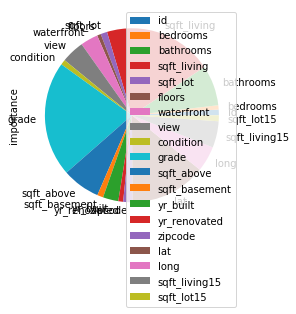

In [45]:
fea_importances.plot(kind='pie',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8116453810>],
      dtype=object)

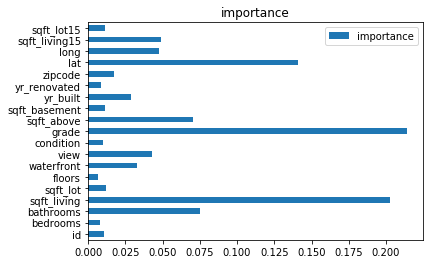

In [46]:
fea_importances.plot(kind='barh',subplots=True)

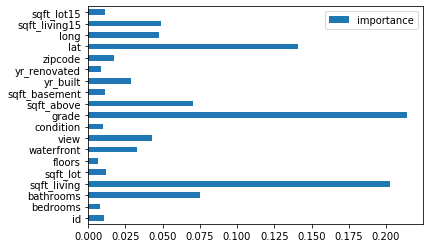

In [47]:
fea_importances.plot(kind='barh')

# One Hot Encoding


In [48]:
loans = pd.read_csv('/root/data/Loan payments data.csv')

In [49]:
loans.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [50]:
education = pd.get_dummies(loans['education'])

In [51]:
education

,Bechalor,High School or Below,Master or Above,college
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
495,0,1,0,0
496,0,1,0,0
497,0,0,0,1
498,0,0,0,1


In [52]:
status = pd.get_dummies(loans['loan_status'])
status

,COLLECTION,COLLECTION_PAIDOFF,PAIDOFF
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
495,0,1,0
496,0,1,0
497,0,1,0
498,0,1,0


In [53]:
gender = pd.get_dummies(loans['Gender'])

In [139]:
final = pd.concat([education,loans,status,gender], axis=1)

In [140]:
final = final.drop(['Loan_ID','education','college','PAIDOFF','loan_status','Gender','female'],axis=1)

In [141]:
final['sex'] = final['male']
final = final.drop(['male'], axis=1)
final

,Bechalor,High School or Below,Master or Above,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,COLLECTION,COLLECTION_PAIDOFF,sex
0,0,1,0,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,0,0,1
1,1,0,0,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,0,0,0
2,1,0,0,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,0,0,0
3,0,0,0,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,0,0,1
4,0,0,0,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,0,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,0,1,1
496,0,1,0,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,0,1,1
497,0,0,0,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,0,1,1
498,0,0,0,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,0,1,0


In [142]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
Bechalor                500 non-null uint8
High School or Below    500 non-null uint8
Master or Above         500 non-null uint8
Principal               500 non-null int64
terms                   500 non-null int64
effective_date          500 non-null object
due_date                500 non-null object
paid_off_time           400 non-null object
past_due_days           200 non-null float64
age                     500 non-null int64
COLLECTION              500 non-null uint8
COLLECTION_PAIDOFF      500 non-null uint8
sex                     500 non-null uint8
dtypes: float64(1), int64(3), object(3), uint8(6)
memory usage: 30.4+ KB


In [143]:
final['paid_off_time'] = pd.to_datetime(final['paid_off_time']).astype(int)/10**15
final['effective_date'] = pd.to_datetime(final['effective_date']).astype(int)/10**15
final['due_date'] = pd.to_datetime(final['due_date']).astype(int)/10**15

In [144]:
final['past_due_days'].fillna(np.mean(final['past_due_days']))

0      36.01
1      36.01
2      36.01
3      36.01
4      36.01
       ...  
495     3.00
496    14.00
497     3.00
498     1.00
499     8.00
Name: past_due_days, Length: 500, dtype: float64

In [145]:
final

,Bechalor,High School or Below,Master or Above,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,COLLECTION,COLLECTION_PAIDOFF,sex
0,0,1,0,1000,30,1473.2928,1475.7984,1473.88146,NaN,45,0,0,1
1,1,0,0,1000,30,1473.2928,1475.7984,1475.83080,NaN,50,0,0,0
2,1,0,0,1000,30,1473.2928,1475.7984,1474.82268,NaN,33,0,0,0
3,0,0,0,1000,15,1473.2928,1474.5024,1474.57440,NaN,27,0,0,1
4,0,0,0,1000,30,1473.3792,1475.8848,1474.66656,NaN,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,0,1000,30,1473.6384,1476.1440,1476.47208,3.0,28,0,1,1
496,0,1,0,1000,15,1473.6384,1474.8480,1476.12972,14.0,26,0,1,1
497,0,0,0,800,15,1473.6384,1474.8480,1475.14974,3.0,30,0,1,1
498,0,0,0,1000,30,1473.6384,1478.7360,1478.90400,1.0,38,0,1,0


In [146]:
final.dtypes

Bechalor                  uint8
High School or Below      uint8
Master or Above           uint8
Principal                 int64
terms                     int64
effective_date          float64
due_date                float64
paid_off_time           float64
past_due_days           float64
age                       int64
COLLECTION                uint8
COLLECTION_PAIDOFF        uint8
sex                       uint8
dtype: object

In [147]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
Bechalor                500 non-null uint8
High School or Below    500 non-null uint8
Master or Above         500 non-null uint8
Principal               500 non-null int64
terms                   500 non-null int64
effective_date          500 non-null float64
due_date                500 non-null float64
paid_off_time           500 non-null float64
past_due_days           200 non-null float64
age                     500 non-null int64
COLLECTION              500 non-null uint8
COLLECTION_PAIDOFF      500 non-null uint8
sex                     500 non-null uint8
dtypes: float64(4), int64(3), uint8(6)
memory usage: 30.4 KB


In [148]:
final['paid_off_time'].fillna(np.mean(final['paid_off_time']),inplace=True)

## Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
model = LogisticRegression()

In [178]:
final['paid_off_time'] = final['paid_off_time'].abs()

In [226]:
final['loan_status'] = loans['loan_status']

In [179]:
x = final.drop(['COLLECTION','COLLECTION_PAIDOFF','past_due_days'],axis=1)

In [221]:
y = final[['loan_status']]

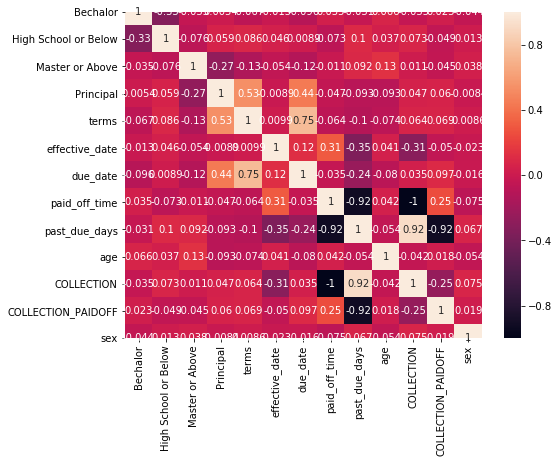

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(final.corr(), annot=True)

In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [228]:
model.fit(x_train,y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [229]:
from sklearn.metrics import classification_report, confusion_matrix

In [230]:
pred = model.predict(x_test)

In [231]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      0.24      0.39        33
           2       0.78      1.00      0.88        89

    accuracy                           0.83       150
   macro avg       0.93      0.75      0.76       150
weighted avg       0.87      0.83      0.79       150



In [232]:
model.fit(x,y)
model.score(x,y)
#model.predict[0]

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.866

In [170]:
from sklearn.feature_selection import SelectKBest, chi2

In [173]:
fea = SelectKBest(score_func=chi2, k=7)

In [181]:
best_fea = fea.fit(x,y)

In [183]:
df1 = pd.DataFrame(best_fea.scores_, columns = ['score'])

In [184]:
df2 = pd.DataFrame(x.columns, columns=['columns'])

In [186]:
merge = pd.concat([df2,df1], axis=1)
merge

,columns,score
0,Bechalor,5.373134e-01
1,High School or Below,1.550239e+00
2,Master or Above,6.250000e-02
3,Principal,1.545802e+01
4,terms,5.765181e+00
5,effective_date,2.842570e-04
6,due_date,3.986516e-04
7,paid_off_time,1.587352e+06
8,age,1.028554e+00
9,sex,4.308511e-01


In [188]:
merge.sort_values(['score'], ascending=False)

,columns,score
7,paid_off_time,1.587352e+06
3,Principal,1.545802e+01
4,terms,5.765181e+00
1,High School or Below,1.550239e+00
8,age,1.028554e+00
0,Bechalor,5.373134e-01
9,sex,4.308511e-01
2,Master or Above,6.250000e-02
6,due_date,3.986516e-04
5,effective_date,2.842570e-04


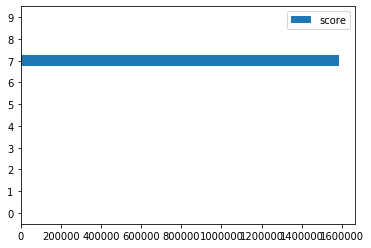

In [195]:
merge.plot(kind='barh')

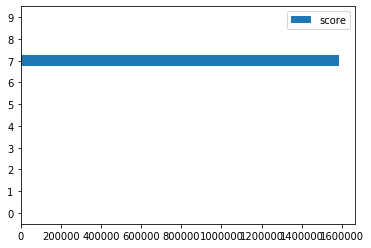

In [196]:
df1.plot(kind='barh')

### Label Encoding 

In [197]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [207]:
final['loan_status'] = loans['loan_status']

In [210]:
dfle = final
dfle['loan_status'] = le.fit_transform(dfle['loan_status'])

In [211]:
dfle.loan_status

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

In [212]:
dfle.columns

Index(['Bechalor', 'High School or Below', 'Master or Above', 'Principal',
       'terms', 'effective_date', 'due_date', 'paid_off_time', 'past_due_days',
       'age', 'COLLECTION', 'COLLECTION_PAIDOFF', 'sex', 'loan_status'],
      dtype='object')

In [213]:
dfle

,Bechalor,High School or Below,Master or Above,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,COLLECTION,COLLECTION_PAIDOFF,sex,loan_status
0,0,1,0,1000,30,1473.2928,1475.7984,1473.88146,NaN,45,0,0,1,2
1,1,0,0,1000,30,1473.2928,1475.7984,1475.83080,NaN,50,0,0,0,2
2,1,0,0,1000,30,1473.2928,1475.7984,1474.82268,NaN,33,0,0,0,2
3,0,0,0,1000,15,1473.2928,1474.5024,1474.57440,NaN,27,0,0,1,2
4,0,0,0,1000,30,1473.3792,1475.8848,1474.66656,NaN,28,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,0,1000,30,1473.6384,1476.1440,1476.47208,3.0,28,0,1,1,1
496,0,1,0,1000,15,1473.6384,1474.8480,1476.12972,14.0,26,0,1,1,1
497,0,0,0,800,15,1473.6384,1474.8480,1475.14974,3.0,30,0,1,1,1
498,0,0,0,1000,30,1473.6384,1478.7360,1478.90400,1.0,38,0,1,0,1


## Decision Trees

In [215]:
from sklearn.tree import DecisionTreeClassifier

In [237]:
tree = DecisionTreeClassifier()
model2 = DecisionTreeClassifier()

In [242]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [224]:
pred = tree.predict(x_test)

In [225]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.87      0.84      0.86        32
           2       0.94      0.95      0.95        84

    accuracy                           0.94       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.94      0.94       150



In [233]:
from sklearn.metrics import accuracy_score

In [234]:
accuracy_score(y_test, pred)

0.8333333333333334

In [238]:
model.fit(x,y)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [239]:
model.score(x,y)

0.866

In [244]:
tree.score(x_test, y_test)

0.9666666666666667

## One-hot encoding

In [67]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [68]:
titanic = pd.read_csv('/root/data/titanic/train.csv')
titanic2 =  pd.read_csv('/root/data/titanic/test.csv')

In [69]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
titanic2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
titanic_clean = titanic.drop(['Cabin','Ticket','Name'], axis=1)

In [73]:
titanic_clean['Embarked'] = titanic_clean['Embarked'].astype(str)

In [74]:
label = LabelEncoder()
titanic_clean.Embarked = label.fit_transform(titanic_clean.Embarked)

In [75]:
titanic_clean.Sex = label.fit_transform(titanic_clean.Sex)

In [76]:
titanic_clean['Age'] = titanic_clean.fillna(np.mean(titanic_clean.Age))
titanic_clean['Embarked'] = titanic_clean.fillna(np.mean(titanic_clean.Embarked))

In [77]:
titanic.Embarked.head(5)

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [78]:
titanic_clean.Embarked

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
886    887.0
887    888.0
888    889.0
889    890.0
890    891.0
Name: Embarked, Length: 891, dtype: float64

In [79]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
titanic_clean

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,1.0,1,0,7.2500,1.0
1,2,1,1,0,2.0,1,0,71.2833,2.0
2,3,1,3,0,3.0,0,0,7.9250,3.0
3,4,1,1,0,4.0,1,0,53.1000,4.0
4,5,0,3,1,5.0,0,0,8.0500,5.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,887.0,0,0,13.0000,887.0
887,888,1,1,0,888.0,0,0,30.0000,888.0
888,889,0,3,0,889.0,1,2,23.4500,889.0
889,890,1,1,1,890.0,0,0,30.0000,890.0


In [81]:
X =titanic_clean.drop(['PassengerId','Survived'], axis=1)

In [82]:
titanic['Embarked'] = titanic['Embarked'].astype(str)

In [83]:
m =titanic.drop(['PassengerId','Survived','Cabin','Ticket','Name'], axis=1)

In [84]:
m_test = titanic2.drop(['PassengerId','Cabin','Ticket','Name'], axis=1)

In [85]:
y = titanic_clean['Survived']

In [86]:
ohe = OneHotEncoder(categorical_features=[1])

In [87]:
ohe.fit_transform(X).toarray()
X

/root/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,1.0,1,0,7.2500,1.0
1,1,0,2.0,1,0,71.2833,2.0
2,3,0,3.0,0,0,7.9250,3.0
3,1,0,4.0,1,0,53.1000,4.0
4,3,1,5.0,0,0,8.0500,5.0
...,...,...,...,...,...,...,...
886,2,1,887.0,0,0,13.0000,887.0
887,1,0,888.0,0,0,30.0000,888.0
888,3,0,889.0,1,2,23.4500,889.0
889,1,1,890.0,0,0,30.0000,890.0


In [88]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [89]:
embarked = pd.get_dummies(m['Embarked'])
#embarked = embarked.drop(['nan'],axis=1)
embarked

,C,Q,S,nan
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
886,0,0,1,0
887,0,0,1,0
888,0,0,1,0
889,1,0,0,0


In [90]:
m['Embarked'] = m['Embarked'].astype(str)

In [91]:
m['Embarked'] = label.fit_transform(m['Embarked'])
m

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,2
1,1,female,38.0,1,0,71.2833,0
2,3,female,26.0,0,0,7.9250,2
3,1,female,35.0,1,0,53.1000,2
4,3,male,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,2
887,1,female,19.0,0,0,30.0000,2
888,3,female,NaN,1,2,23.4500,2
889,1,male,26.0,0,0,30.0000,0


In [92]:
m_test['Embarked'] = label.fit_transform(m_test['Embarked'])
m_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [93]:
m['Age']  = m['Age'].fillna(np.mean(m.Age))

In [94]:
#m['Embarked'] = m['Embarked'].astype(str)
m['Age'] = m['Age'].astype(int)

In [95]:
m['Sex'] = label.fit_transform(m['Sex'])
m

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,2
1,1,0,38,1,0,71.2833,0
2,3,0,26,0,0,7.9250,2
3,1,0,35,1,0,53.1000,2
4,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,2
887,1,0,19,0,0,30.0000,2
888,3,0,29,1,2,23.4500,2
889,1,1,26,0,0,30.0000,0


In [96]:
m_test['Age']  = m['Age'].fillna(np.mean(m_test.Age))

In [97]:
m_test['Fare']  = m['Fare'].fillna(np.mean(m_test.Age))

In [98]:
m_test['Sex'] = label.fit_transform(m_test['Sex'])
m_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,0,0,7.2500,1
1,3,0,38,1,0,71.2833,2
2,2,1,26,0,0,7.9250,1
3,3,1,35,0,0,53.1000,2
4,3,0,35,1,1,8.0500,2
...,...,...,...,...,...,...,...
413,3,1,29,0,0,0.0000,2
414,1,0,44,0,0,7.9250,0
415,3,1,29,0,0,8.0500,2
416,3,1,34,0,0,32.5000,2


In [99]:
ohe.fit_transform(m).toarray()
m

/root/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,2
1,1,0,38,1,0,71.2833,0
2,3,0,26,0,0,7.9250,2
3,1,0,35,1,0,53.1000,2
4,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,2
887,1,0,19,0,0,30.0000,2
888,3,0,29,1,2,23.4500,2
889,1,1,26,0,0,30.0000,0


In [100]:
m1 = m.drop(['SibSp'],axis=1)
m2 = m.drop(['SibSp','Age'],axis=1)
m3 = m2.drop(['Embarked'],axis=1)

### Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [103]:
m

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,2
1,1,0,38,1,0,71.2833,0
2,3,0,26,0,0,7.9250,2
3,1,0,35,1,0,53.1000,2
4,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,2
887,1,0,19,0,0,30.0000,2
888,3,0,29,1,2,23.4500,2
889,1,1,26,0,0,30.0000,0


In [104]:
log.fit(m,y)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
log.score(m,y)

0.8035914702581369

### Extra Trees

In [106]:
from sklearn.ensemble import ExtraTreesClassifier

In [107]:
ext = ExtraTreesClassifier()

In [108]:
ext.fit(m,y)

/root/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [109]:
ext.score(m,y)

0.9764309764309764

In [178]:
pred = ext.predict(m_test)


In [111]:
pred_df = pd.DataFrame(pred,columns=['Survived'])
pred_df

,Survived
0,0
1,0
2,0
3,1
4,0
...,...
413,1
414,1
415,0
416,0


In [112]:
titanic2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [113]:
id = titanic2['PassengerId']

In [114]:
sub = pd.concat([id,pred_df],axis=1)

In [115]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,0


In [116]:
sub.to_csv('sub2.csv',index=False)

In [117]:
sub = pd.read_csv('sub2.csv')

In [118]:
sub.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.344498
std,120.810458,0.475774
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


### Feature Importance

In [119]:
from sklearn.feature_selection import SelectKBest, chi2

In [120]:
best_fea = SelectKBest(score_func=chi2,k=7)

In [121]:
best_fea.fit(m,y)

SelectKBest(k=7, score_func=<function chi2 at 0x7f28d79ff050>)

In [122]:
best_features = pd.DataFrame(best_fea.scores_,m.columns,columns=['score'])


In [123]:
best_features = best_features.nlargest(n=7,columns=['score'])

In [124]:
best_features

,score
Fare,4518.319091
Sex,92.702447
Pclass,30.873699
Age,23.458444
Parch,10.097499
Embarked,9.755456
SibSp,2.581865


## Gaussian Transformation

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
    titanic_df = titanic.copy()


In [14]:
def impute_na(titanic, variable):
    titanic_df = titanic.copy()
    titanic_df[variable+'_random'] = titanic_df[variable]
    random_sample = titanic_df[variable].dropna().sample(titanic_df[variable].isnull().sum(), random_state=0)
    random_sample.index = titanic_df[titanic_df[variable].isnull()].index
    titanic_df.loc[titanic_df[variable].isnudll(), variable+'_random'] = random_sample
    return titanic_df[variable+ '_random']

In [15]:
titanic_df['Age'] = impute_na(titanic_df, 'Age')

In [19]:
titanic_df['Cabin'] = impute_na(titanic_df, 'Age')

In [20]:
titanic_df['Embarked'] = impute_na(titanic_df, 'Embarked')

In [21]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Q-Q plot

In [29]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [196]:
def diagnostic_plots(titanic_df,variable):
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    titanic_df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(titanic_df[variable],dist="norm",plot=plt)
    

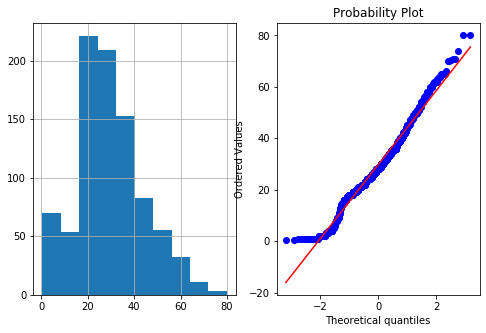

In [197]:
diagnostic_plots(titanic_df, 'Age')

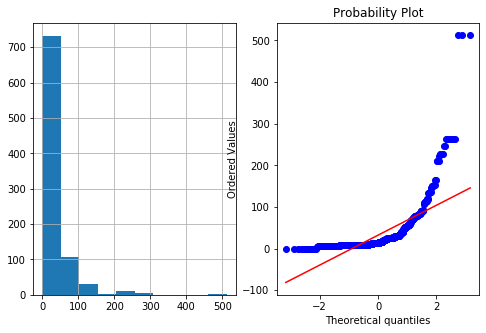

In [198]:
diagnostic_plots(titanic_df, 'Fare')

In [39]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()


In [47]:
titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'])

In [48]:
titanic_df['Embarked'].dtype

dtype('int64')

In [49]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [50]:
titanic_df['Embarked'] = titanic_df['Embarked'].astype(int)
titanic_df['Embarked']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Embarked, Length: 891, dtype: int64

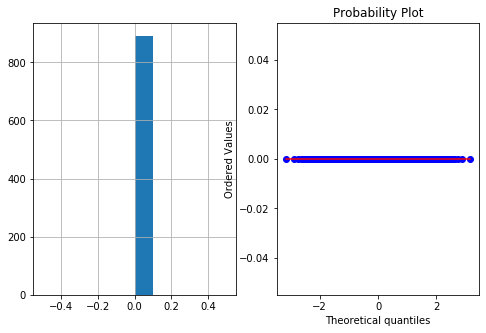

In [199]:
diagnostic_plots(titanic_df, 'Embarked')

### Logarithimic Transformation

In [53]:
import numpy as np
titanic_df['log_Fare'] = np.log(titanic_df['Fare']+1)

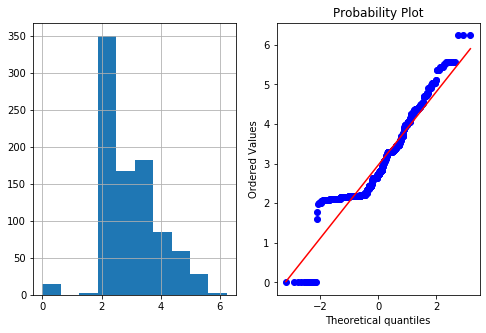

In [200]:
diagnostic_plots(titanic_df, 'log_Fare')

## Reciprocal Transformation

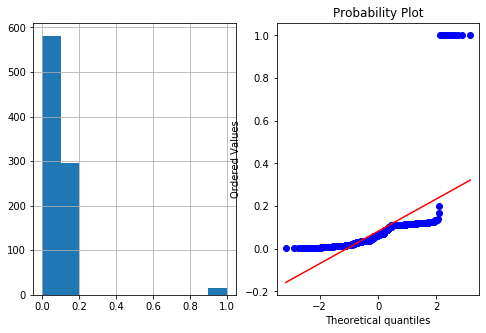

In [201]:
titanic_df['Rec_Fare'] = 1/(titanic_df['Fare']+1)
diagnostic_plots(titanic_df, "Rec_Fare")

### Square-Root Transformation

In [59]:
titanic_df['sqrt_Fare'] = titanic['Fare'] **(1/2)

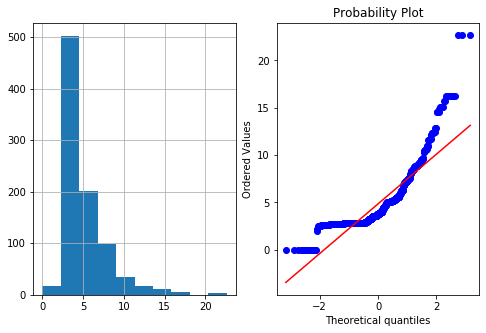

In [202]:
diagnostic_plots(titanic_df, 'sqrt_Fare')

### Exponential Transformation

In [61]:
titanic_df['exp_Fare'] = np.exp(titanic_df['Fare'])

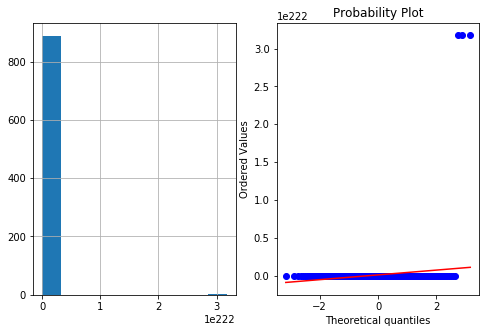

In [203]:
diagnostic_plots(titanic_df,'exp_Fare')

### BoxCox

In [229]:
titanic['Fare_boxcox'], param = stats.boxcox(titanic_df.Fare+1)

In [230]:
print('optimal lambda:', param)

optimal lambda: -0.09778702818680361


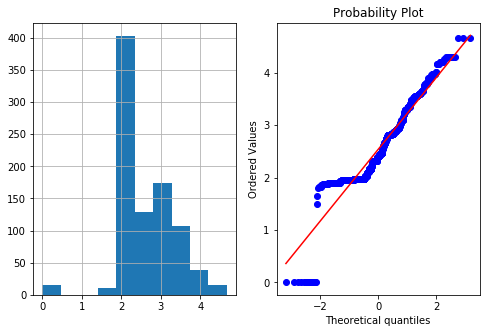

In [231]:
diagnostic_plots(titanic, 'Fare_boxcox')

# Hyperparameter Tuning

In [126]:
from sklearn.svm import SVC
clf = SVC()

In [127]:
clf.fit(m,y)

/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [130]:
pred = clf.predict(m_test)

In [156]:
clf.score(m,y)

0.8484848484848485

In [139]:
from sklearn.model_selection import train_test_split, GridSearchCV#, RandomSearchCV

In [133]:
X_train, X_test, y_train, y_test = train_test_split(m,y, test_size=.3)

In [151]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit(X_test)

In [160]:
X_train_scaled.dtype

dtype('float64')

In [152]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [232]:
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test)

/root/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [153]:
from sklearn.metrics import classification_report, confusion_matrix

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       163
           1       0.63      0.56      0.59       105

    accuracy                           0.70       268
   macro avg       0.68      0.67      0.68       268
weighted avg       0.69      0.70      0.69       268



## Grid Search Cv

In [233]:
grid = {
    'c': [ 1,10,100,1000],
    'kernel':("rbf",'linear'),
    'gamma': [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.80,.9]
}

In [213]:
grid_search_cv = GridSearchCV(svc, param_grid=parameters, scoring='accuracy', n_jobs=-1)

In [172]:
grid_search_cv.fit(X_train, y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [175]:
grid_search_cv.score(X_train,y_train)

0.7929373996789727

In [217]:
grid_search_cv.best_score_

0.8250401284109149

In [218]:
grid_search_cv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [216]:
grid2 = grid_search_cv.fit(X_train_scaled, y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [222]:
grid2.score(X_train,y_train) # Scaling doesnot work well

0.6195826645264848

In [221]:
grid2.best_score_

0.8250401284109149

In [223]:
grid2.best_params_

{'C': 1, 'kernel': 'rbf'}

In [173]:
from sklearn.preprocessing import StandardScaler

In [150]:
steps = [('scaler', StandardScaler()),
             ('SVM', SVC())]

pipeline = Pipeline(steps)

    # Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
                  'SVM__gamma':[0.1, 0.01]}



NameError: name 'Pipeline' is not defined

In [167]:
from sklearn import svm, datasets
>>> from sklearn.model_selection import GridSearchCV
>>> iris = datasets.load_iris()
>>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
>>> svc = svm.SVC(gamma="scale")
>>> clf = GridSearchCV(svc, parameters, cv=5)
>>> clf.fit(iris.data, iris.target)
...                             

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [165]:
>>> sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [181]:
predict = grid_search_cv.predict(m_test)

In [192]:
pred_df = pd.DataFrame(predict,columns=['Survived'])
pred_df

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [189]:
id = titanic2.PassengerId
id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [193]:
subm = pd.concat([id,pred_df],axis=1)
subm.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [194]:
subm.to_csv('subm2.csv',index=False)

In [205]:
X_test.shape

(268, 7)

In [206]:
m_test.shape

(418, 7)

In [208]:
m.shape

(891, 7)

In [209]:
y_train.shape

(623,)

In [210]:
y_test.shape

(268,)

## Random Search Cv

In [243]:
grid = {
    'c': [ 1,10,100,1000],
    'kernel':("rbf",'linear'),
    'gamma': [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.80,.9]
}


In [239]:
>>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}


In [224]:
from sklearn.model_selection import RandomizedSearchCV

In [246]:
random = RandomizedSearchCV(clf, param_distributions=parameters, n_jobs=-1)

In [247]:
random.fit(X_train,y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


ValueError: Invalid parameter kernel for estimator GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0). Check the list of available parameters with `estimator.get_params().keys()`.

In [248]:
clf

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [249]:
svm

<module 'sklearn.svm' from '/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/__init__.py'>

In [250]:
# Load libraries
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV

In [251]:
iris = datasets.load_iris()
X = iris.data
y = iris.target



In [252]:
logistic = linear_model.LogisticRegression()

In [253]:
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [254]:
clf = RandomizedSearchCV(logistic, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [255]:
best_model = clf.fit(X, y)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [256]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.668088018810296


In [257]:
best_model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [258]:
best_model.best_score_

0.9666666666666667

## Random Forest

In [259]:
from sklearn.ensemble import RandomForestClassifier

In [260]:
rf = RandomForestClassifier()

In [261]:
rf.fit(X_train,y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [262]:
rf_pred = rf.predict(X_test)

In [264]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       163
           1       0.80      0.66      0.72       105

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [267]:
rf.score(X_train,y_train)

0.9727126805778491

In [268]:
rf.score(X_test,y_test)

0.8022388059701493